## Homework 1 — Human Activity Recognition from Wearable Sensor Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from pathlib import Path

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['figure.dpi'] = 100

BASE_DIR = Path('/home/krishna/sjsu/semester-2/advTopicsInCS/homework1')
WISDM_RAW = BASE_DIR / 'data' / 'WISDM' / 'wisdm-dataset' / 'raw'
PAMAP2_DIR = BASE_DIR / 'data' / 'PAMAP2_Dataset' / 'Protocol'
PLOTS_DIR = BASE_DIR / 'plots'

### Part A — WISDM Dataset

In [12]:
# Load a single subject file: watch accelerometer for subject 1600
col_names = ['user', 'activity', 'timestamp', 'x', 'y', 'z']

wisdm_file = WISDM_RAW / 'watch' / 'accel' / 'data_1600_accel_watch.txt'

wisdm_df = pd.read_csv(
    wisdm_file,
    header=None,
    names=col_names,
    lineterminator=';',
    on_bad_lines='skip'
)

# Clean up
wisdm_df['activity'] = wisdm_df['activity'].astype(str).str.strip()
wisdm_df['user'] = pd.to_numeric(wisdm_df['user'], errors='coerce')
wisdm_df['z'] = pd.to_numeric(wisdm_df['z'], errors='coerce')
wisdm_df.dropna(subset=['user', 'x', 'y', 'z'], inplace=True)
wisdm_df['user'] = wisdm_df['user'].astype(int)

# Activity code mapping (from activity_key.txt)
activity_map = {
    'A': 'Walking',    'B': 'Jogging',    'C': 'Stairs',
    'D': 'Sitting',    'E': 'Standing',   'F': 'Typing',
    'G': 'Teeth',      'H': 'Soup',       'I': 'Chips',
    'J': 'Pasta',      'K': 'Drinking',   'L': 'Sandwich',
    'M': 'Kicking',    'O': 'Catch',      'P': 'Dribbling',
    'Q': 'Writing',    'R': 'Clapping',   'S': 'Folding',
}

print(f"Shape: {wisdm_df.shape}")
print(f"Activities in file: {sorted(wisdm_df['activity'].unique())}")
print(f"\nSamples per activity:")
print(wisdm_df['activity'].value_counts().rename(activity_map).sort_index())
wisdm_df.head()

Shape: (65462, 6)
Activities in file: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'O', 'P', 'Q', 'R', 'S']

Samples per activity:
activity
Catch        3605
Chips        3605
Clapping     3605
Dribbling    3605
Drinking     3606
Folding      4176
Jogging      3605
Kicking      3605
Pasta        3605
Sandwich     3605
Sitting      3606
Soup         3605
Stairs       3605
Standing     3605
Teeth        3604
Typing       3605
Walking      3605
Writing      3605
Name: count, dtype: int64


,user,activity,timestamp,x,y,z
0,1600,A,9.042671e+13,7.091625,-0.591667,8.195502
1,1600,A,9.042676e+13,4.972757,-0.158317,6.696732
2,1600,A,9.042681e+13,3.253720,-0.191835,6.107758
3,1600,A,9.042686e+13,2.801216,-0.155922,5.997625
4,1600,A,9.042691e+13,3.770868,-1.051354,7.731027


### Task 1: Plot: 5 seconds of Typing vs 5 seconds of Clapping

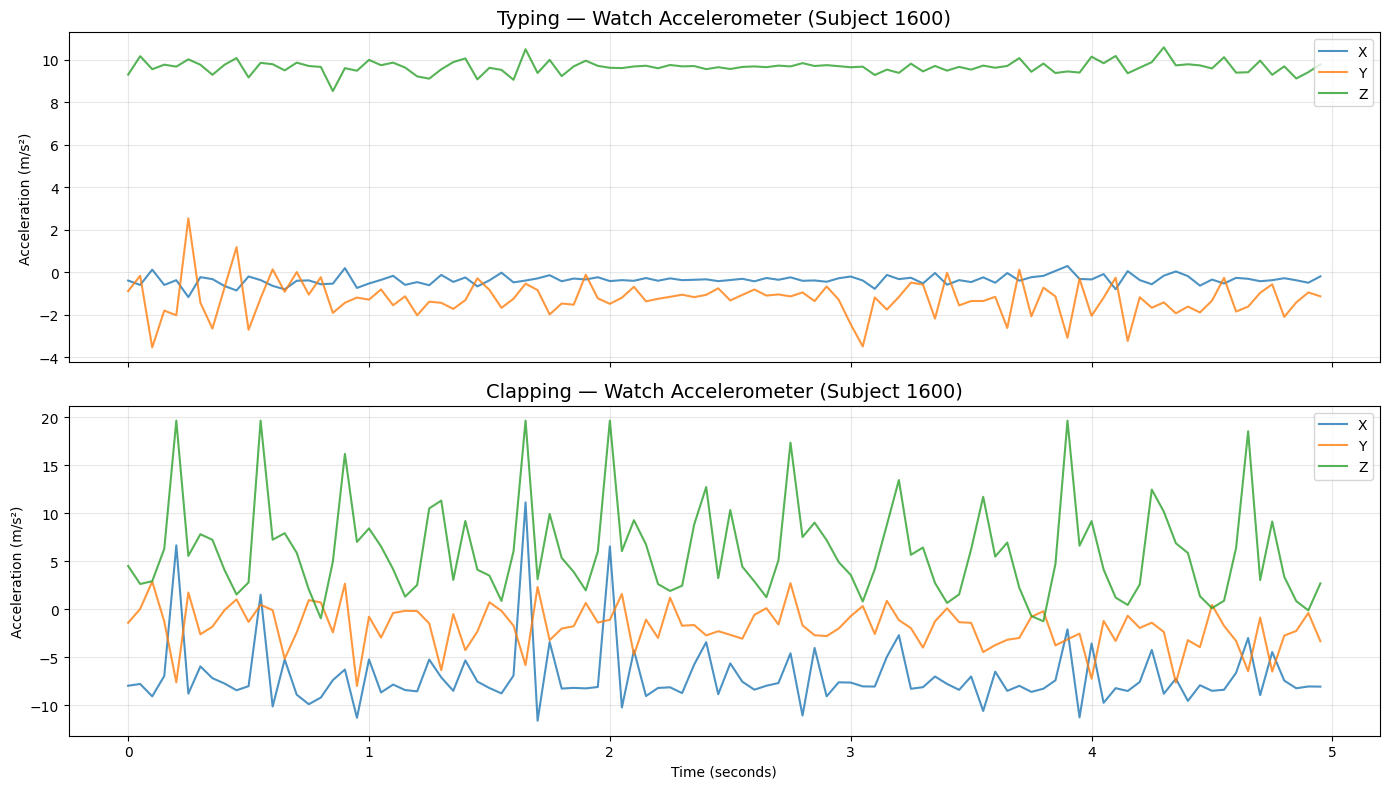

Typing samples: 100, Clapping samples: 100


In [13]:
SAMPLE_RATE_HZ = 20
DURATION_SEC = 5
N_SAMPLES = SAMPLE_RATE_HZ * DURATION_SEC  # 100 samples

# Extract first 5 seconds of Typing (F) and Clapping (R)
typing_df = wisdm_df[wisdm_df['activity'] == 'F'].head(N_SAMPLES).reset_index(drop=True)
clapping_df = wisdm_df[wisdm_df['activity'] == 'R'].head(N_SAMPLES).reset_index(drop=True)

# Create a time axis in seconds
time_axis = np.arange(N_SAMPLES) / SAMPLE_RATE_HZ

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Typing ---
axes[0].plot(time_axis, typing_df['x'], label='X', alpha=0.8)
axes[0].plot(time_axis, typing_df['y'], label='Y', alpha=0.8)
axes[0].plot(time_axis, typing_df['z'], label='Z', alpha=0.8)
axes[0].set_title('Typing — Watch Accelerometer (Subject 1600)', fontsize=14)
axes[0].set_ylabel('Acceleration (m/s²)')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# --- Clapping ---
axes[1].plot(time_axis, clapping_df['x'], label='X', alpha=0.8)
axes[1].plot(time_axis, clapping_df['y'], label='Y', alpha=0.8)
axes[1].plot(time_axis, clapping_df['z'], label='Z', alpha=0.8)
axes[1].set_title('Clapping — Watch Accelerometer (Subject 1600)', fontsize=14)
axes[1].set_ylabel('Acceleration (m/s²)')
axes[1].set_xlabel('Time (seconds)')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'wisdm_typing_vs_clapping_5s.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Typing samples: {len(typing_df)}, Clapping samples: {len(clapping_df)}")

### Task 2: Plot: 5 seconds of Walking vs Jogging

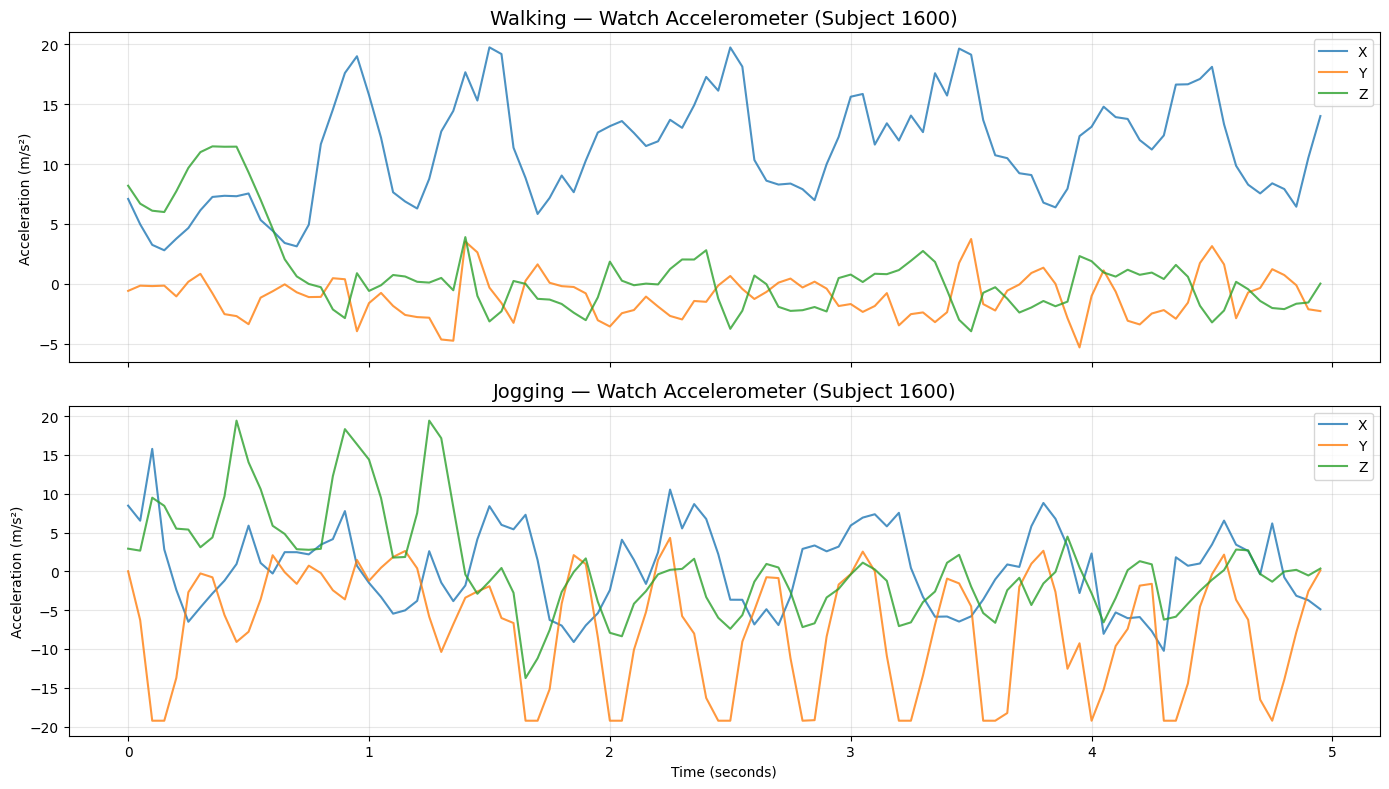

Walking samples: 100, Jogging samples: 100


In [14]:
# Extract first 5 seconds of Walking (A) and Jogging (B)
walking_df = wisdm_df[wisdm_df['activity'] == 'A'].head(N_SAMPLES).reset_index(drop=True)
jogging_df = wisdm_df[wisdm_df['activity'] == 'B'].head(N_SAMPLES).reset_index(drop=True)

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Walking ---
axes[0].plot(time_axis, walking_df['x'], label='X', alpha=0.8)
axes[0].plot(time_axis, walking_df['y'], label='Y', alpha=0.8)
axes[0].plot(time_axis, walking_df['z'], label='Z', alpha=0.8)
axes[0].set_title('Walking — Watch Accelerometer (Subject 1600)', fontsize=14)
axes[0].set_ylabel('Acceleration (m/s²)')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# --- Jogging ---
axes[1].plot(time_axis, jogging_df['x'], label='X', alpha=0.8)
axes[1].plot(time_axis, jogging_df['y'], label='Y', alpha=0.8)
axes[1].plot(time_axis, jogging_df['z'], label='Z', alpha=0.8)
axes[1].set_title('Jogging — Watch Accelerometer (Subject 1600)', fontsize=14)
axes[1].set_ylabel('Acceleration (m/s²)')
axes[1].set_xlabel('Time (seconds)')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'wisdm_walking_vs_jogging_5s.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Walking samples: {len(walking_df)}, Jogging samples: {len(jogging_df)}")

### Part B — PAMAP2 Dataset

In [15]:
def load_pamap2(protocol_path: Path) -> pd.DataFrame:
    """
    Load all PAMAP2 .dat files from Protocol/.
    Each file has 54 space-separated columns:
      timestamp, activityID, heartrate,
      then 17 features × 3 IMU positions (hand, chest, ankle).
    
    IMU 17-feature block:
      temperature, acc_16g(x,y,z), acc_6g(x,y,z), gyro(x,y,z),
      mag(x,y,z), orientation(1,2,3,4)
    """
    # Build column names
    imu_features = [
        'temperature',
        'acc16_x', 'acc16_y', 'acc16_z',
        'acc6_x',  'acc6_y',  'acc6_z',
        'gyro_x',  'gyro_y',  'gyro_z',
        'mag_x',   'mag_y',   'mag_z',
        'orient_1','orient_2','orient_3','orient_4'
    ]

    columns = ['timestamp', 'activityID', 'heartrate']
    for position in ['hand', 'chest', 'ankle']:
        for feat in imu_features:
            columns.append(f'{position}_{feat}')

    # Activity ID → name mapping
    activity_map = {
        0: 'transient', 1: 'lying', 2: 'sitting', 3: 'standing',
        4: 'walking', 5: 'running', 6: 'cycling', 7: 'nordic_walking',
        9: 'watching_TV', 10: 'computer_work', 11: 'car_driving',
        12: 'ascending_stairs', 13: 'descending_stairs',
        16: 'vacuum_cleaning', 17: 'ironing',
        18: 'folding_laundry', 19: 'house_cleaning',
        20: 'playing_soccer', 24: 'rope_jumping'
    }

    frames = []
    dat_files = sorted(protocol_path.glob('subject*.dat'))
    print(f"Found {len(dat_files)} subject files in Protocol/")

    for fpath in dat_files:
        subject_id = int(fpath.stem.replace('subject', ''))
        print(f"  Loading subject {subject_id}...")
        df = pd.read_csv(fpath, sep=r'\s+', header=None, names=columns)
        df['subject'] = subject_id
        frames.append(df)

    pamap = pd.concat(frames, ignore_index=True)

    # Drop transient activity (activityID == 0) — not useful
    pamap = pamap[pamap['activityID'] != 0].reset_index(drop=True)

    # Map activity IDs to names
    pamap['activity'] = pamap['activityID'].map(activity_map)

    # Drop orientation columns (marked invalid in documentation)
    orient_cols = [c for c in pamap.columns if 'orient_' in c]
    pamap.drop(columns=orient_cols, inplace=True)

    return pamap

pamap_df = load_pamap2(PAMAP2_DIR)
print(f"\nPAMAP2 shape: {pamap_df.shape}")
print(f"Columns ({len(pamap_df.columns)}): {list(pamap_df.columns)}")
print(f"\nActivity distribution:\n{pamap_df['activity'].value_counts()}")
print(f"\nSubjects: {sorted(pamap_df['subject'].unique())}")
print(f"NaN percentage: {pamap_df.isna().mean().mean()*100:.2f}%")
pamap_df.head()

Found 9 subject files in Protocol/
  Loading subject 101...
  Loading subject 102...
  Loading subject 103...
  Loading subject 104...
  Loading subject 105...
  Loading subject 106...
  Loading subject 107...
  Loading subject 108...
  Loading subject 109...

PAMAP2 shape: (1942872, 44)
Columns (44): ['timestamp', 'activityID', 'heartrate', 'hand_temperature', 'hand_acc16_x', 'hand_acc16_y', 'hand_acc16_z', 'hand_acc6_x', 'hand_acc6_y', 'hand_acc6_z', 'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z', 'hand_mag_x', 'hand_mag_y', 'hand_mag_z', 'chest_temperature', 'chest_acc16_x', 'chest_acc16_y', 'chest_acc16_z', 'chest_acc6_x', 'chest_acc6_y', 'chest_acc6_z', 'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 'chest_mag_x', 'chest_mag_y', 'chest_mag_z', 'ankle_temperature', 'ankle_acc16_x', 'ankle_acc16_y', 'ankle_acc16_z', 'ankle_acc6_x', 'ankle_acc6_y', 'ankle_acc6_z', 'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z', 'ankle_mag_x', 'ankle_mag_y', 'ankle_mag_z', 'subject', 'activity']

Activi

,timestamp,activityID,heartrate,hand_temperature,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_acc6_y,ankle_acc6_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,subject,activity
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,101,lying
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,101,lying
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,101,lying
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,101,lying
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,101,lying


### Task 3 — Plot: 5 seconds of Rhythmic vs Irregular Motion

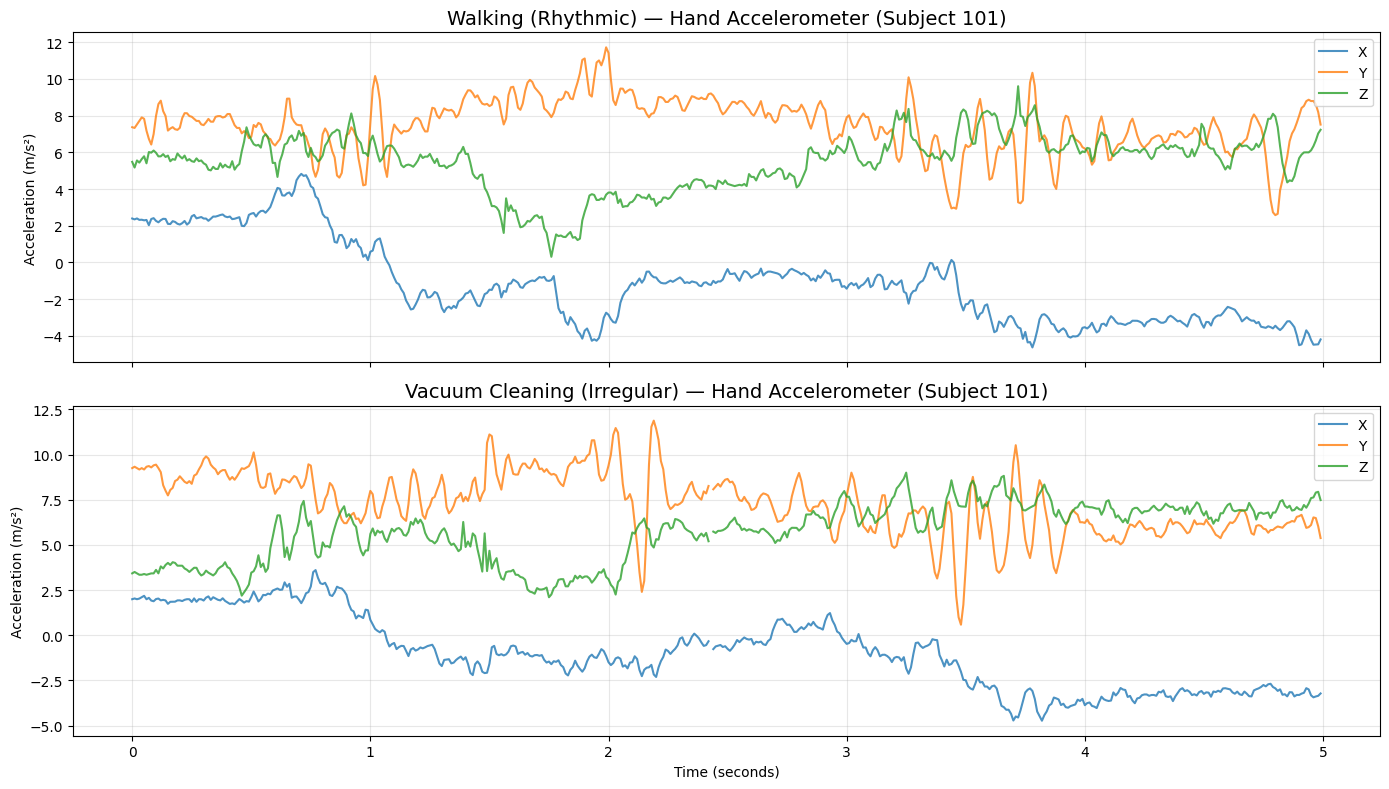

Walking samples: 500, Vacuum Cleaning samples: 500


In [16]:
PAMAP_HZ = 100
PAMAP_DURATION = 5
PAMAP_N = PAMAP_HZ * PAMAP_DURATION  # 500 samples

# Filter for subject 101, Walking (4) and Vacuum Cleaning (16)
subj = 101
walking_pamap = pamap_df[(pamap_df['subject'] == subj) & (pamap_df['activityID'] == 4)].head(PAMAP_N).reset_index(drop=True)
vacuum_pamap  = pamap_df[(pamap_df['subject'] == subj) & (pamap_df['activityID'] == 16)].head(PAMAP_N).reset_index(drop=True)

pamap_time = np.arange(PAMAP_N) / PAMAP_HZ

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Walking (Rhythmic) ---
axes[0].plot(pamap_time, walking_pamap['hand_acc16_x'], label='X', alpha=0.8)
axes[0].plot(pamap_time, walking_pamap['hand_acc16_y'], label='Y', alpha=0.8)
axes[0].plot(pamap_time, walking_pamap['hand_acc16_z'], label='Z', alpha=0.8)
axes[0].set_title('Walking (Rhythmic) — Hand Accelerometer (Subject 101)', fontsize=14)
axes[0].set_ylabel('Acceleration (m/s²)')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# --- Vacuum Cleaning (Irregular) ---
axes[1].plot(pamap_time, vacuum_pamap['hand_acc16_x'], label='X', alpha=0.8)
axes[1].plot(pamap_time, vacuum_pamap['hand_acc16_y'], label='Y', alpha=0.8)
axes[1].plot(pamap_time, vacuum_pamap['hand_acc16_z'], label='Z', alpha=0.8)
axes[1].set_title('Vacuum Cleaning (Irregular) — Hand Accelerometer (Subject 101)', fontsize=14)
axes[1].set_ylabel('Acceleration (m/s²)')
axes[1].set_xlabel('Time (seconds)')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'pamap2_rhythmic_vs_irregular_5s.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Walking samples: {len(walking_pamap)}, Vacuum Cleaning samples: {len(vacuum_pamap)}")

### Task 4 — Plot: 5 seconds of Running

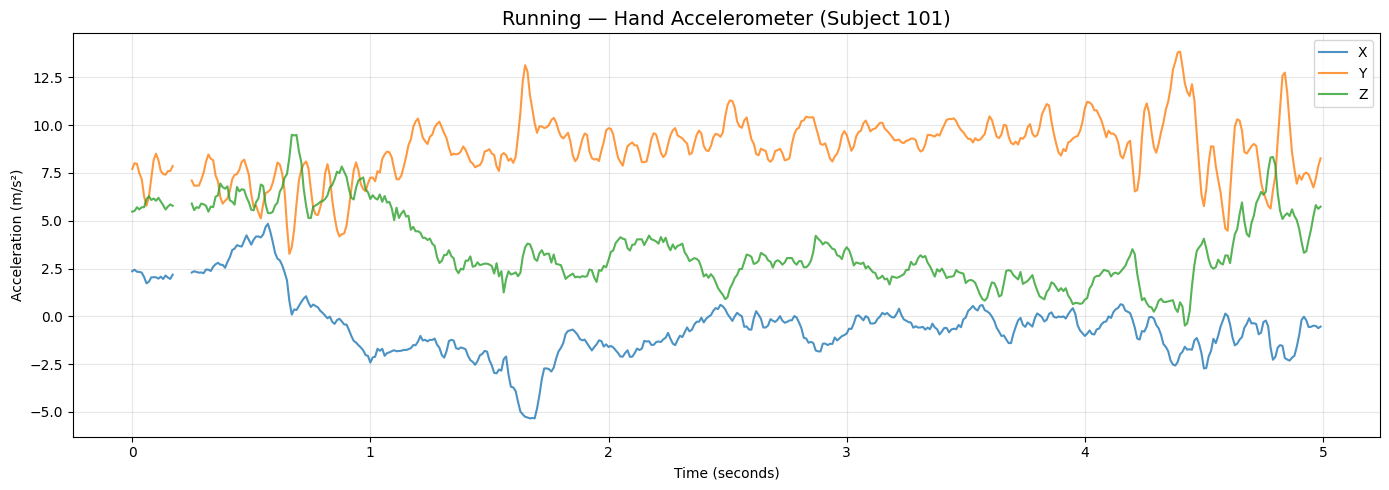

Running samples: 500


In [17]:
# Running (activityID 5) for subject 101
running_pamap = pamap_df[(pamap_df['subject'] == subj) & (pamap_df['activityID'] == 5)].head(PAMAP_N).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(pamap_time, running_pamap['hand_acc16_x'], label='X', alpha=0.8)
ax.plot(pamap_time, running_pamap['hand_acc16_y'], label='Y', alpha=0.8)
ax.plot(pamap_time, running_pamap['hand_acc16_z'], label='Z', alpha=0.8)
ax.set_title('Running — Hand Accelerometer (Subject 101)', fontsize=14)
ax.set_ylabel('Acceleration (m/s²)')
ax.set_xlabel('Time (seconds)')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'pamap2_running_5s.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Running samples: {len(running_pamap)}")